# Variance inflation factor

One of the important assumptions in linear regression is that the independent variables should not be correlated. But when we usually check the correlation between independent variable we can only visualize them pairwise $i.e.;$ two variables at a time.

Their arises a problem when we face situations such that the three variables may not be correlated pairwise but correlated in 3d space. we can visualize them in the following plots.

Observe the picture below where the relation ship look non-linear and hence the correlation coefficient will be less.

  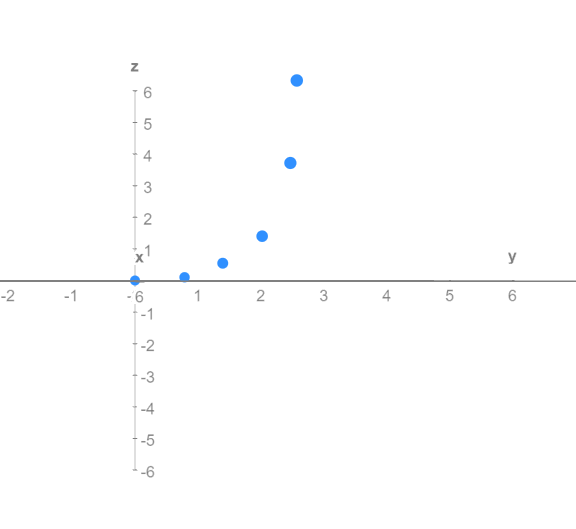

Here we eliminate the y axis from the same 3d plot and even here the relationship is non-linear and correlation fails.

  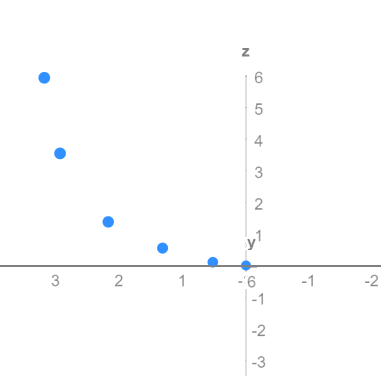

Eliminate z axis and here to relationship looks non-linear

  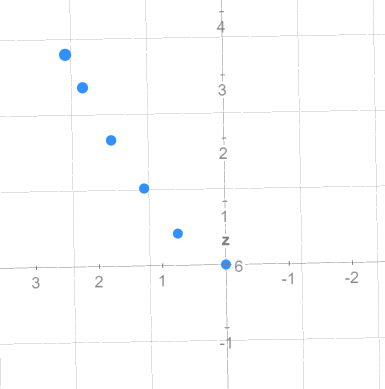

Bt when we visualize in new angle the relationship may look linear like and we can see that even though the relationship is linear we cannot visualize or represent using any other metric.

  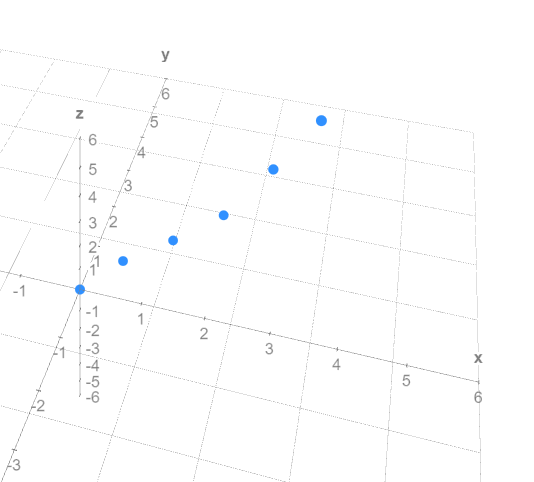

To visualize in 3d [click here](https://www.math3d.org/3nlycKZ6l)

To overcome this the we use variance inflation factor(VIF). It helps us to identify the degree of multicollinearity. It exist when there is a linear relationship, between one or more of the independent variable or inputs.

Hence VIF allow us to measure how much a variable is contributing to the standard error.

$$ VIF = \frac 1 {1- R_i^2} $$

Where,

$ R_i^2$ represents the unadjusted coefficient of determination of regressing the $i^{th}$ independent variable on the remaining one.

Hence, Higher the T-squared value indicates higher degree of multicollinearity.

Here if $ VIF=1$ represents no multicollinearity and higher values indicate higher degree of multicollinearity. So, $VIF \ge 5$ represents problematic amount of multicollinearity.

In [5]:
# import the required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

In [7]:
# declare a dataframe with 4 independent variable
df = pd.DataFrame(
    {'a': [1, 1, 2, 3, 4],
     'b': [2, 2, 3, 2, 1],
     'c': [4, 6, 7, 8, 9],
     'd': [4, 3, 4, 5, 4]}
)
df

,a,b,c,d
0,1,2,4,4
1,1,2,6,3
2,2,3,7,4
3,3,2,8,5
4,4,1,9,4


In [8]:
# add constant term to the model
X = add_constant(df)
X

c:\Users\i\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,d
0,1.0,1,2,4,4
1,1.0,1,2,6,3
2,1.0,2,3,7,4
3,1.0,3,2,8,5
4,1.0,4,1,9,4


In [14]:
# calculate the VIF for one variable
variance_inflation_factor(X.values, 1)

22.949999999999985

Gives the VIF of column `a`

In [15]:
# you can get the VIF of all the columns here
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const    136.875
a         22.950
b          3.000
c         12.950
d          3.000
dtype: float64

In [18]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
# check the unique values in the gender column
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [25]:
# create dummy variables
df['gender'] = df['gender'].map({'male':0, 'female':1})

In [27]:
# Create independent variable set
X = df[['gender', 'math score', 'reading score']]

In [28]:
# create a data frame to store the VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [30]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

         feature         VIF
0         gender    3.844361
1     math score  102.160313
2  reading score  122.487442


Based on the above VIF we can either drop `math score` or `reading score` because they have very high correlation. That can seen using scatter plot below

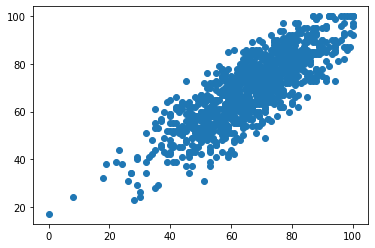

In [33]:
import matplotlib.pyplot as plt

plt.scatter(df['math score'], df['reading score']);

# Jarque-Bera test

It is test for goodness of fit. It measures if the sample data has skewness and kurtosis in comparison with a normal distribution.

A normal distribution will have a skewness of $0$ and kurtosis of $3$.

Skewness: it is the measure of symmetry of the data

Kurtosis: It is the measure of flatness or peak of the distribution of the data.

$$ JB = \frac n 6 \left [ S_k^2 + \frac {(K-3)^2} 4 \right ]$$

Where,

$S_k$ is the coefficient of skewness based on moments

$$ S_k = \frac {\sqrt {\beta _1} ( \beta_2 +3)} { 2 (5 \beta _2 - 6 \beta_1 -9)} $$

where, $\beta _1$ and $ \beta _2 $ are pearson's coefficient

$ \beta _1 = \frac {\mu _3 ^2} { \mu _2 ^3} $

$ \beta _2 = \frac {\mu _4} {\mu _2 ^2} $

and $K$ is coefficient of kurtosis

$$ K = \beta _2 - 3 $$

In [34]:
# import required libraries
from scipy.stats import jarque_bera

In [35]:
jarque_bera(df['math score'])

Jarque_beraResult(statistic=15.912256686712709, pvalue=0.0003505075386818213)

Here from p-value we can hypothesis that the data is not normally distributed.

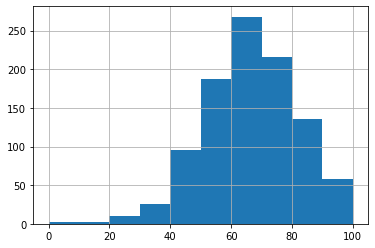

In [42]:
df['math score'].hist();

We can confirm it from the histogram that the data is skewed and deviating from the normality

# Durbin-Watson test

One of the very important assumption of linear regression is that there should be no correlation between the residuals $i.e.;$ no auto correlation. Residuals should not be correlated with their lag values.

So the Durbin-watson test is to test the autocorrelation in a regression model's output.

<h3> Some Assumptions</h3>

   * The errors are normally distributed with mean 0.
   * The errors are stationary.

<h3> Hypothesis we test</h3>

$H_0:$ There is no autocorrelation among the residuals.

$H_1:$ the residuals are autocorrelated.

<h3> Test statistic </h3>

$$ Durbin \hspace{.5em} watson = \frac {\sum _{t=2} ^T (e_t - e_{t-1})} {\sum _{t=1} ^T e_t^2} $$

Where, $e_t$ are residuals from an ordinary least square regression.

The Durbin-watson statistic will be between $0$ and $4$.
  * $2$ means there is no autocorrelation.
  * $0$ and $\le 2$ is positive autocorrelation(usually seen in time series data)
  * $ >2$ to $4$ is negative autocorrelation.

In general, test statistic value within the range of $1.5$ to $2.5$ are relatively normal and we accept the null hypothesis.

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [2]:
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


Fit the multiple linear regression by keeping rating as a response and rest as independent variable.

In [7]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('rating ~ points + assists + rebounds', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Wed, 01 Jun 2022   Prob (F-statistic):             0.0995
Time:                        11:46:16   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

c:\Users\i\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ou can see the Durbin-watson statistic mentioned in the summary which is 2.392. Hence we can conclude that the residuals are not correlated.

You can even test that using `durbin_watson` in same library by just giving the residuals as a output.

In [8]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

2.3920546872335327

You can see there is a match between the both.